In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_csv("F:\Machine_learning\Social_Network_Ads.csv")

In [3]:
data.shape

(400, 5)

In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
x = data.iloc[:,[2,3]]
y = data.iloc[:,[4]].values.ravel()

In [6]:
data.head().T

,0,1,2,3,4
User ID,15624510,15810944,15668575,15603246,15804002
Gender,Male,Male,Female,Female,Male
Age,19,35,26,27,19
EstimatedSalary,19000,20000,43000,57000,76000
Purchased,0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [10]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
pred_y = classifier.predict(X_test)

In [11]:
accuracy = classifier.score(X_test,y_test)
print(accuracy)

0.9375


In [12]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,pred_y)

In [13]:
print(cn)

[[54  4]
 [ 1 21]]


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.84      0.95      0.89        22

    accuracy                           0.94        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.94      0.94        80



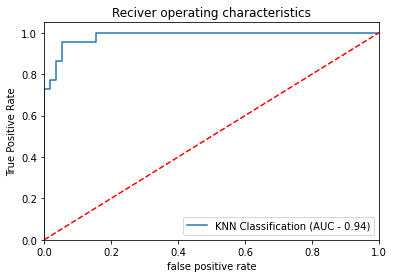

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Area_Under_Curve = roc_auc_score(y_test,classifier.predict(X_test))
fpr,tpr,thresholds= roc_curve(y_test,classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label = "KNN Classification (AUC - %0.2f)"% Area_Under_Curve)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0 ,1.05])
plt.xlabel("false positive rate")
plt.ylabel("True Positive Rate")
plt.title("Reciver operating characteristics")
plt.legend(loc ="lower right")
plt.show()